<img src="fga.png" width="1200" height="400">


<h1><center>Escolha de Ativos com K-Means para Swing Trade </center></h1>

A presente atividade prática abordará a clusterização k-means entre outros aspectos fundamentais para a formação de uma carteira de ativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/" a/>
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<div id="k_means">
    <h2>Clusterização K-Means</h2>
</div>


A técnica de aprendizado de maquina denominada <b>K-Means</b> é um das mais populares de "clustering" não supervisionado. O K significa os centróides que são aplicados para definir os clusters. Um ponto é considerado em um cluster específico se estiver mais próximo do centróide desse cluster do que de qualquer outro centróide.
Algoritmo K-Means: 

<ol> &emsp;
  <li>Inicia $k$ centroides ($\normalsize \mu_1,\mu_2,....,\mu_k \in \mathbb{R}$), aleatoriamente </li> &emsp;
  <li>Para todos $i$, determine $\normalsize  c^{(i)}:= argmin_j ||x^{(i)} - \mu_j ||^2$</li> &emsp;
  <li>Para todos $j$, determine $\normalsize  \mu_j:= \frac{\sum_{i=1}^{m}1\{c^{(i)}=j\}x^{(i)} }{\sum_{i=1}^{m}1\{c^{(i)}=j\}} $</li> &emsp;
  <li>Repita os procedimentos 2 e 3 até convergir! </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;



In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
from pandas_datareader import data
from tqdm import tqdm

start_date = '2019-09-07'
end_date = '2020-09-07'


df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBRA&idioma=pt-br')
Symbols=[sy+'.SA' for sy in list(df[0]['Código'].values)]


output = None
sym=[]
for sy in tqdm(Symbols): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym
output.head()

  9%|▉         | 14/158 [00:15<04:22,  1.82s/it]

Erro BBDC4.SA


100%|██████████| 158/158 [02:36<00:00,  1.01it/s]

Erro Quantidade Teórica Total  Redutor.SA


,AALR3,ABCB4,ABEV3,ALPA4,ALSO3,ALUP11,AMAR3,ANIM3,ARZZ3,AZUL4,...,USIM5,VALE3,VIVA3,VIVT4,VLID3,VULC3,VVAR3,WEGE3,WIZS3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-09,19.131762,17.923262,18.387077,22.515234,35.799999,25.099407,8.15,19.600000,47.801838,48.389999,...,8.213524,46.653759,NaN,48.992180,12.282948,7.17,7.01,22.360195,10.326095,31.084049
2019-09-10,18.774714,17.669584,18.338356,22.545187,35.490002,24.665640,7.88,19.360001,47.682159,48.150002,...,8.243247,46.994724,NaN,48.594624,12.808269,7.29,6.78,22.706789,10.307817,32.144066
2019-09-11,18.844139,17.903748,18.426054,23.403862,36.240002,25.128983,8.33,20.200001,49.327744,49.389999,...,8.173893,46.712212,NaN,49.371254,12.645897,7.49,6.98,22.855326,10.691620,32.389442
2019-09-12,18.933401,17.845207,18.874283,22.784817,36.200001,24.990967,8.30,20.320000,48.569778,52.049999,...,8.203616,48.407291,NaN,49.509933,12.569487,7.67,7.10,22.825617,10.508857,33.577053
2019-09-13,18.943319,17.806179,18.611191,22.804787,35.529999,25.000826,8.46,20.209999,47.971378,51.340000,...,8.055000,48.504715,NaN,47.901207,12.703205,7.63,6.91,23.489100,10.371785,32.899822


['Erros', 292, 'Ativos', 156]

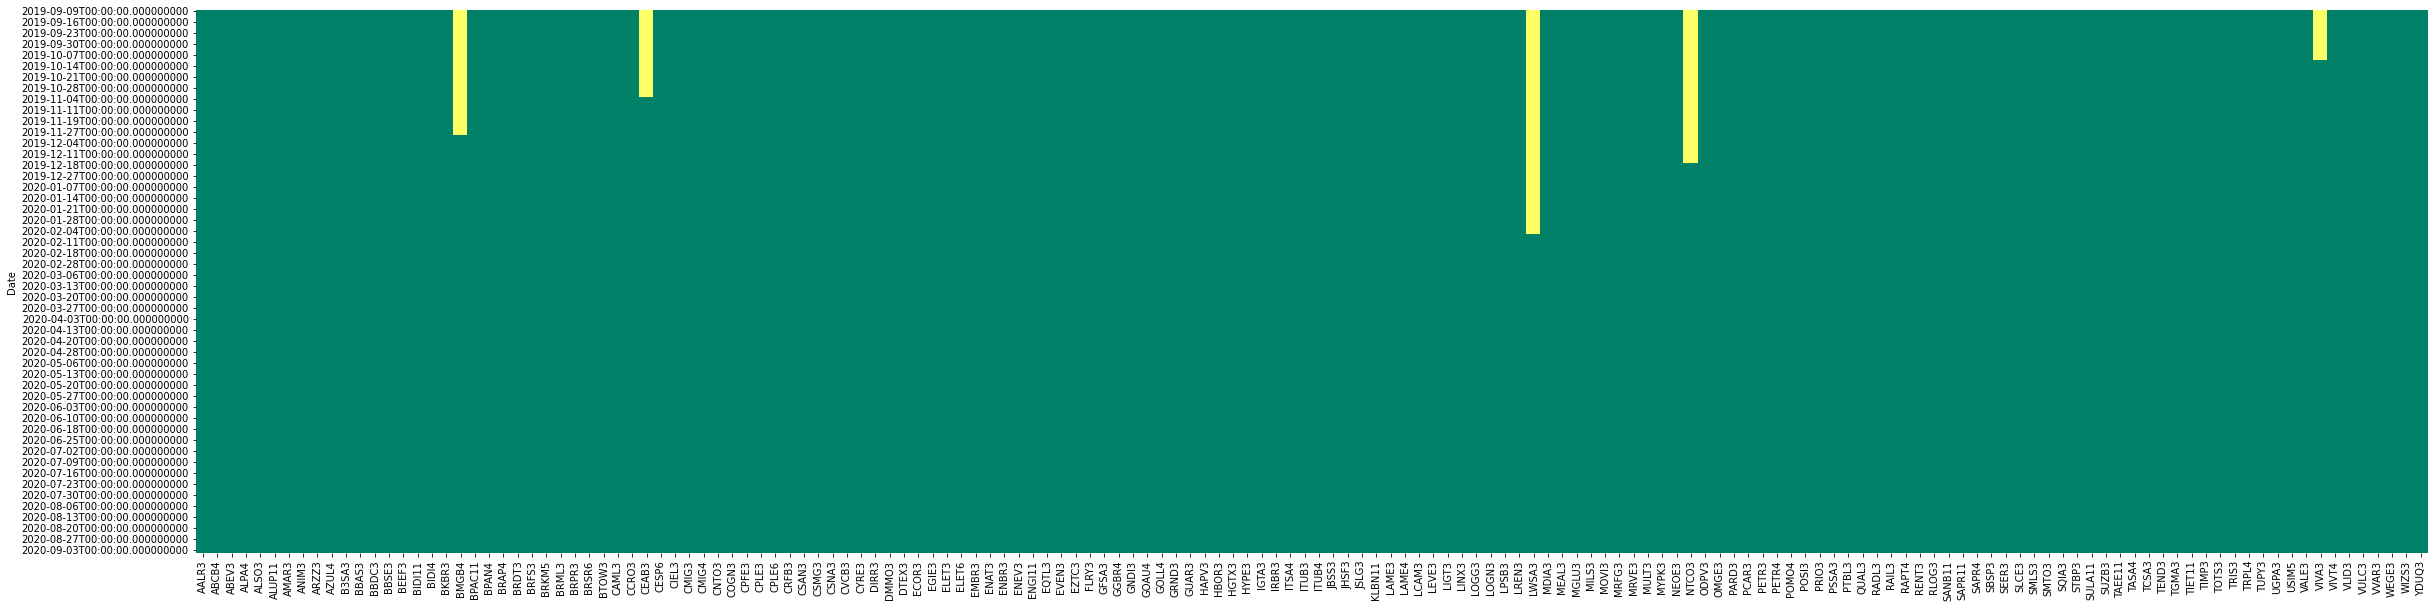

In [2]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 151]

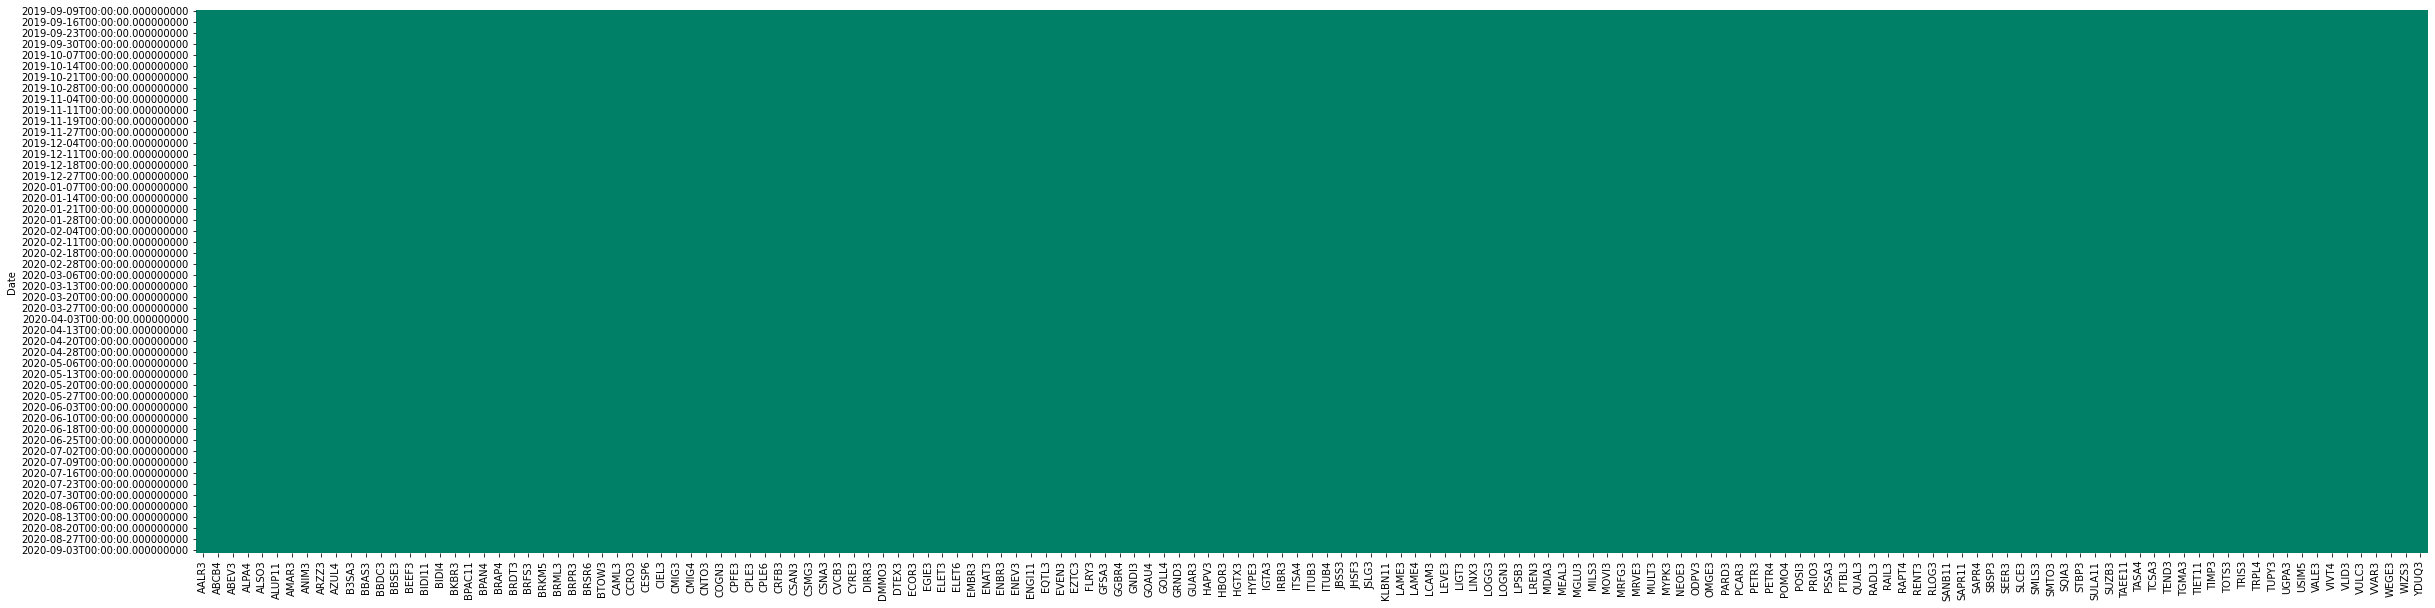

In [3]:
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'TCSA3', 'HBOR3']


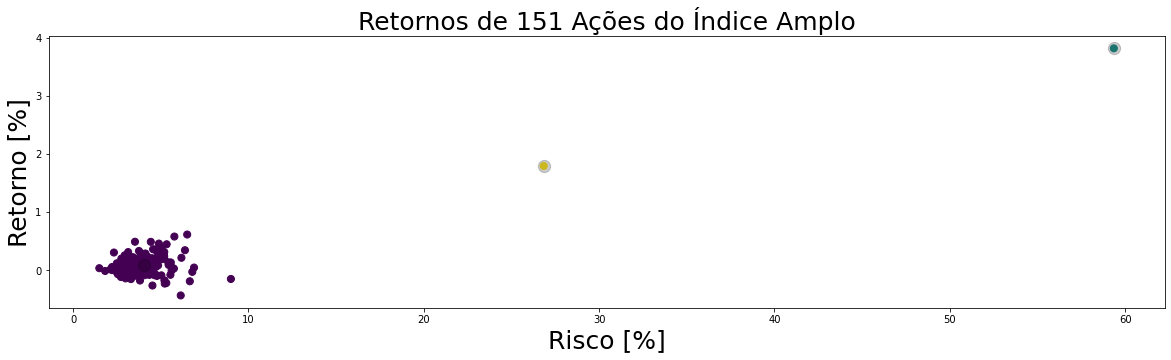

In [4]:
%matplotlib inline 
from sklearn.cluster import KMeans

retornos=100*output.pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

In [5]:
retornos.mean().sort_values().tail()

WEGE3    0.492014
VVAR3    0.581340
PRIO3    0.616256
HBOR3    1.796125
TCSA3    3.821294
dtype: float64

In [6]:
retornos.std().sort_values().tail()

AZUL4     6.817111
GOLL4     6.916158
DMMO3     9.022706
HBOR3    26.899387
TCSA3    59.476931
dtype: float64

Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'VVAR3', 'MGLU3']


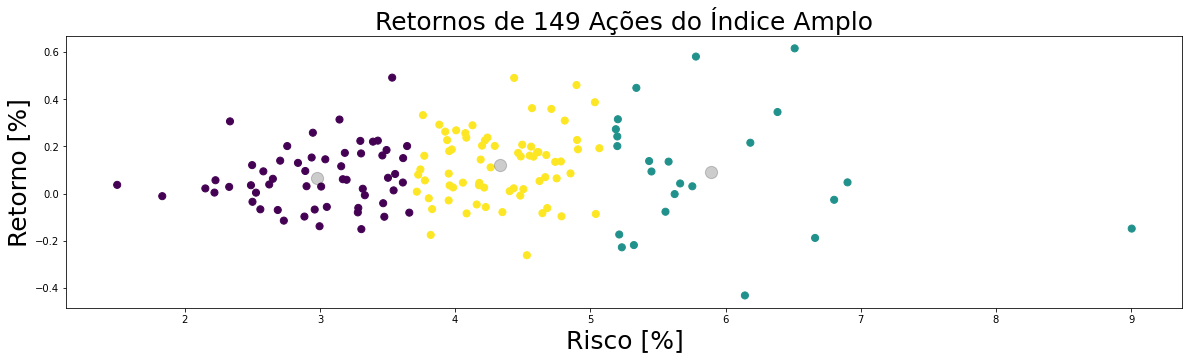

In [7]:
retornos=100*output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

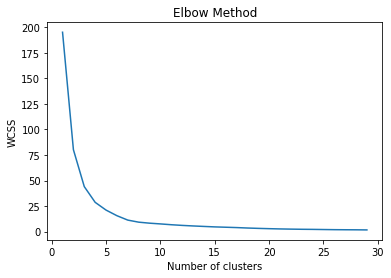

In [8]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Ativos com Melhor Relação em Cada Cluster: ['CAML3', 'MGLU3', 'WEGE3', 'PRIO3']


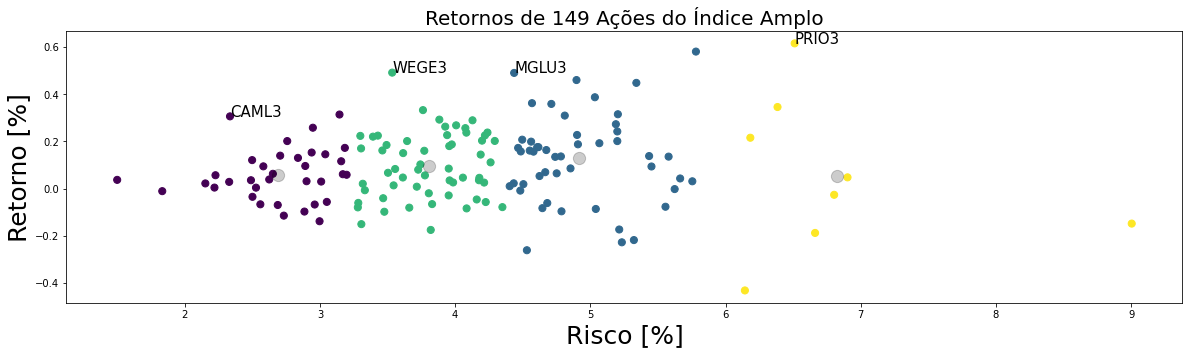

In [9]:
retornos=output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns


X=100*np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=4

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=20)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)


In [10]:
retornos[rb].describe()

,CAML3,MGLU3,WEGE3,PRIO3
count,246.000000,246.000000,246.000000,246.000000
mean,0.003064,0.004908,0.004920,0.006163
std,0.023390,0.044451,0.035412,0.065245
min,-0.089247,-0.210771,-0.206197,-0.365406
25%,-0.008876,-0.011617,-0.011067,-0.016591
50%,0.002906,0.002302,0.004779,0.000713
75%,0.015433,0.024353,0.020391,0.030211
max,0.099379,0.235294,0.138945,0.322877


<b>Fim da Atividade!!!</b> 
